In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
batch_size = 32
img_height = 180
img_width = 180

In [4]:
data_dir = "/mnt/c/users/bouchc2/downloads/archive"

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 44406 files belonging to 15 classes.
Using 35525 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_ds = val_ds.take(2000)
val_ds = val_ds.skip(2000)

Found 44406 files belonging to 15 classes.
Using 8881 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Apple', 'Banana', 'Carambola', 'Guava', 'Kiwi', 'Mango', 'Muskmelon', 'Orange', 'Peach', 'Pear', 'Persimmon', 'Pitaya', 'Plum', 'Pomegranate', 'Tomatoes']


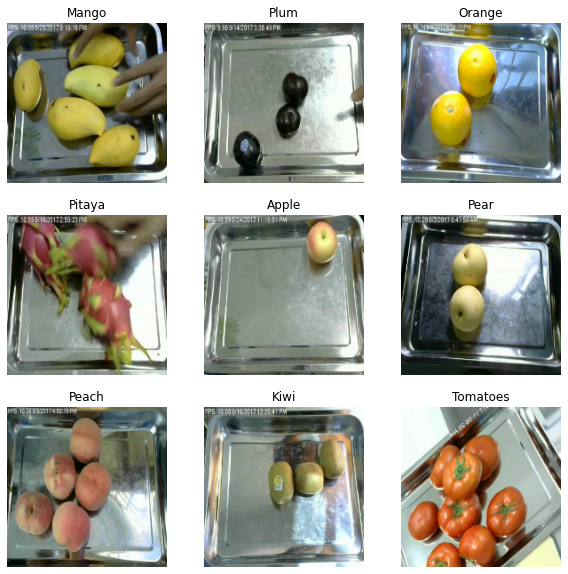

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
num_classes = 15
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
epochs = 3
data = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size = batch_size,
  epochs=epochs
)

Epoch 1/3
1111/1111 [==============================] - 349s 314ms/step - loss: 0.2262 - accuracy: 0.9231
Epoch 2/3
1111/1111 [==============================] - 348s 313ms/step - loss: 0.1106 - accuracy: 0.9641
Epoch 3/3
1111/1111 [==============================] - 345s 311ms/step - loss: 0.0630 - accuracy: 0.9811


In [15]:
acc = data.history['accuracy']
# validation_acc = data.history['val_accuracy']

loss = data.history['loss']
# validation_loss = data.history['val_loss']
epochs_range = range(epochs)

In [16]:
classes = train_ds.class_names 
predictions = model.predict(test_ds)
prediction_indeces = np.argmax(predictions, axis = 1)

n = list(map(lambda x:x[1], test_ds))

image_list = []
for x in n:
    for y in x:
        image_list.append(y)
        
for i in range(0, 10):
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(classes[np.argmax(tf.nn.softmax(predictions[i]))], 100 * np.max(tf.nn.softmax(predictions[i]))))

This image most likely belongs to Pear with a 99.12 percent confidence.
This image most likely belongs to Apple with a 99.81 percent confidence.
This image most likely belongs to Pear with a 43.89 percent confidence.
This image most likely belongs to Tomatoes with a 100.00 percent confidence.
This image most likely belongs to Orange with a 99.52 percent confidence.
This image most likely belongs to Pear with a 99.03 percent confidence.
This image most likely belongs to Pomegranate with a 99.98 percent confidence.
This image most likely belongs to Tomatoes with a 100.00 percent confidence.
This image most likely belongs to Pear with a 60.71 percent confidence.
This image most likely belongs to Mango with a 99.78 percent confidence.
